## execute in google colab - 

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
dataset = pd.read_csv('indian_liver_patient.csv') # in google colab '/content/indian_liver_patient.csv'

In [3]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
dataset['Dataset'].value_counts() # TARGET COL

1    416
0    167
Name: Dataset, dtype: int64

In [17]:
#!pip install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
  Using cached numba-0.54.1-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached mlflow-2.1.1-py3-none-any.whl (16.7 MB)
  Using cached spacy-2.3.9-cp39-cp39-win_amd64.whl (9.1 MB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached scipy-1.5.4-cp39-cp39-win_amd64.whl (31.4 MB)
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached pycaret-2.3.9-py3-none-any.whl (319 kB)
  Using cached pycaret-2.3.8-py3-none-any.whl (318 kB)
  Using cached pycaret-2.3.7-py3-none-any.whl (318 kB)
  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB

  ERROR: Command errored out with exit status 1:
   command: 'E:\Anaconda\python.exe' 'C:\Users\deepak\AppData\Local\Temp\pip-standalone-pip-3iex8wd_\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\deepak\AppData\Local\Temp\pip-build-env-icnhppon\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_syst


  Using cached pycaret-2.3.2-py3-none-any.whl (263 kB)
  Using cached pycaret-2.3.1-py3-none-any.whl (261 kB)
  Using cached pycaret-2.3.0-py3-none-any.whl (261 kB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached pycaret-2.2.3-py3-none-any.whl (249 kB)
  Using cached catboost-1.1.1-cp39-none-win_amd64.whl (74.0 MB)
  Using cached pycaret-2.2.2-py3-none-any.whl (249 kB)
  Using cached pyod-1.0.7-py3-none-any.whl
  Using cached spacy-3.5.0-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached scipy-1.9.3-cp39-cp39-win_amd64.whl (40.2 MB)
  Using cached docker-6.0.1-py3-none-any.whl (147 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached alembic-1.9.2-py3-none-any.whl (210 kB)
  Using cached sqlparse-0.4.3-py3-none-any


    customize MSVCCompiler
      libraries lapack_atlas not found in E:\Anaconda\libs
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries f77blas,cblas,atlas not found in E:\Anaconda\libs
    <class 'numpy.distutils.system_info.atlas_info'>
      NOT AVAILABLE
  
    lapack_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack not found in ['E:\\Anaconda\\lib', 'C:\\', 'E:\\Anaconda\\libs']
      NOT AVAILABLE
  
    C:\Users\deepak\AppData\Local\Temp\pip-install-0fi6ldq_\numpy_8072d0043e2541178e464d5646bc9894\numpy\distutils\system_info.py:1712: UserWarning:
        Lapack (http://www.netlib.org/lapack/) libraries not found.
        Directories to search for the libraries can be specified in the
        numpy/distutils/site.cfg file (section [lapack]) or by setting
        the LAPACK environment variable.


In [11]:
#!pip install numba==0.53

  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [6]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [7]:
exp_clf101 = setup(data=dataset, target='Dataset', session_id=125)

,Description,Value
0,session_id,125
1,Target,Dataset
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(583, 11)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Dataset',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [8]:
# comparing model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7403,0.7467,0.9253,0.7639,0.8363,0.2322,0.2667,0.472
ada,Ada Boost Classifier,0.7257,0.7463,0.8403,0.7926,0.8135,0.2892,0.2965,0.158
dummy,Dummy Classifier,0.7182,0.5000,1.0000,0.7182,0.8359,0.0000,0.0000,0.008
rf,Random Forest Classifier,0.7107,0.7316,0.8806,0.7572,0.8132,0.1731,0.1857,0.305
lightgbm,Light Gradient Boosting Machine,0.7087,0.7282,0.8328,0.7764,0.8026,0.2424,0.2488,0.194
ridge,Ridge Classifier,0.7060,0.0000,0.9560,0.7234,0.8233,0.0366,0.0832,0.014
gbc,Gradient Boosting Classifier,0.6985,0.7106,0.8397,0.7638,0.7997,0.1908,0.1949,0.149
lda,Linear Discriminant Analysis,0.6985,0.7187,0.9355,0.7250,0.8165,0.0407,0.0651,0.016
et,Extra Trees Classifier,0.6937,0.7048,0.8500,0.7544,0.7981,0.1612,0.1732,0.236
knn,K Neighbors Classifier,0.6813,0.6880,0.8192,0.7557,0.7849,0.1639,0.1697,0.024


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7561,0.7242,0.9333,0.7778,0.8485,0.2491,0.2790
1,0.6585,0.6909,0.8333,0.7353,0.7812,0.0171,0.0178
2,0.7561,0.7000,0.9000,0.7941,0.8438,0.2979,0.3104
3,0.7561,0.7471,0.9655,0.7568,0.8485,0.2679,0.3305
4,0.7561,0.7213,0.8966,0.7879,0.8387,0.3471,0.3596
5,0.7317,0.6351,0.9655,0.7368,0.8358,0.1694,0.2309
6,0.7317,0.7989,0.9655,0.7368,0.8358,0.1694,0.2309
7,0.7317,0.8132,0.8966,0.7647,0.8254,0.2619,0.2780
8,0.7500,0.8088,0.9310,0.7714,0.8438,0.2453,0.2751


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [10]:
# model tunning
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7561,0.7182,0.9333,0.7778,0.8485,0.2491,0.2790
1,0.6585,0.7000,0.8333,0.7353,0.7812,0.0171,0.0178
2,0.7561,0.7091,0.9000,0.7941,0.8438,0.2979,0.3104
3,0.7561,0.7471,0.9655,0.7568,0.8485,0.2679,0.3305
4,0.7561,0.7241,0.8966,0.7879,0.8387,0.3471,0.3596
5,0.7317,0.6322,0.9655,0.7368,0.8358,0.1694,0.2309
6,0.7317,0.8017,0.9655,0.7368,0.8358,0.1694,0.2309
7,0.7317,0.8075,0.8966,0.7647,0.8254,0.2619,0.2780
8,0.7500,0.8088,0.9310,0.7714,0.8438,0.2453,0.2751


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=2.688, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


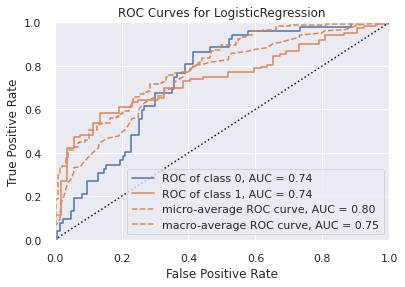

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [11]:
plot_model(tuned_lr, plot='auc')

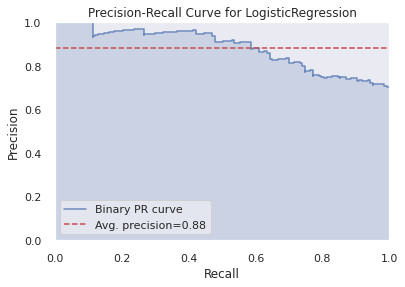

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
plot_model(tuned_lr, plot='pr')

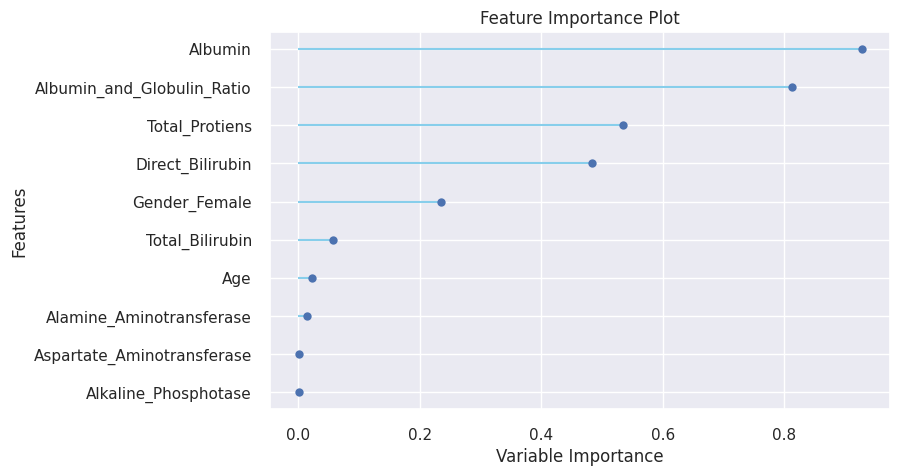

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [13]:
plot_model(tuned_lr, plot='feature')

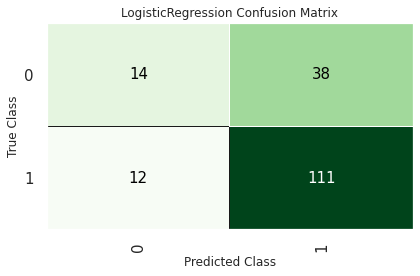

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
plot_model(tuned_lr, plot='confusion_matrix')

In [15]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.688, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# predict the test dataset

testdata = predict_model(tuned_lr, data=test) # pls do it when you have train and test data given